# Import Necessary Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Load Data from CSV

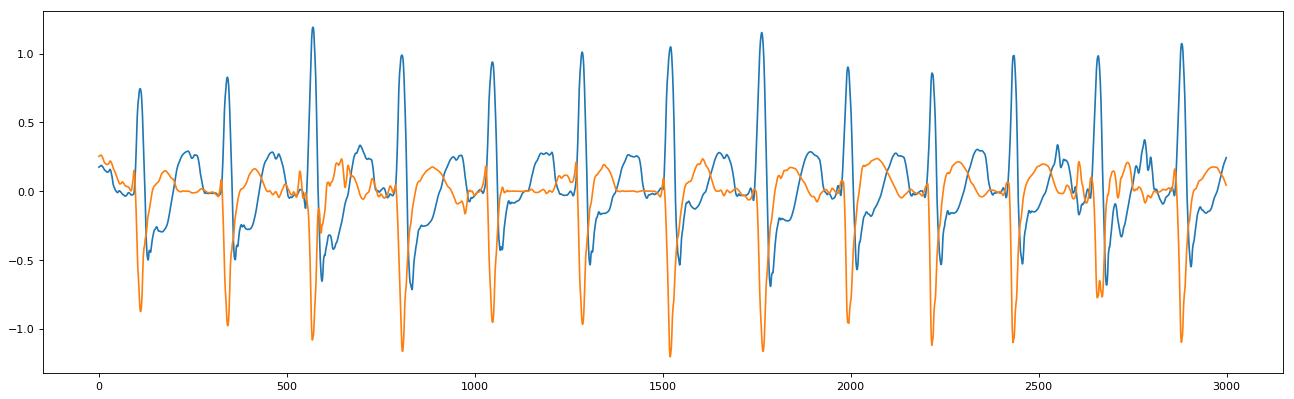

In [2]:
DS1 = ['101', '106', '108', '109', '112', '114', '115', '116', '118', '119', '122', '124', 
       '201', '203', '205', '207', '208', '209', '215', '220', '223', '230']

trainingSet_leads = {}
trainingSet_anns = {}
for ds in DS1:
    trainingSet_leads[ds] = pd.read_csv('Cleaned TrainingSet/' + ds + '_lead.csv')
    trainingSet_anns[ds] = pd.read_csv('Cleaned TrainingSet/' + ds + '_ann.csv')

# 测试读取情况
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(trainingSet_leads['109'][:3000])
plt.show()

# Heartbeat Annotation

In [3]:
N = ['N', 'L', 'R', 'e', 'j']
SVEB = ['A', 'a', 'J', 'S']
VEB = ['V', 'E']
F = ['F']
Q = ['P', 'f', 'U']
Non_beat_anns = ['[', ']', '!', 'x', '(', ')', 'p', 't', 'u', '`', '~', '^', '|', '+', 's', 'T', '*', 'D', '=', '"', '@']

# Heatbeat Segmentation

For each heartbeat knowing the R location, we take samples from the interval of 250 ms before R peak and 400 ms after R peak, i.e. total 0.65 s of each heartbeat. That is, 90 samples before R peak and 144 samples after R peak.

In [4]:
Hbs = {}
for ds in DS1:
    lead0 = trainingSet_leads[ds]['lead0']
    lead1 = trainingSet_leads[ds]['lead1']
    hbs0 = []
    hbs1 = []
    anns = []
    annIdxs = []
    for row in trainingSet_anns[ds].itertuples():
        if row[2] in Non_beat_anns:
            continue
        elif row[1] < 91:
            continue
        elif row[1] + 144 > len(lead0):
            continue
        else:
            anns.append(row[2])
            annIdxs.append(row[1] - 1)
            hbs0.append(lead0[row[1] - 91: row[1] + 144])
            hbs1.append(lead1[row[1] - 91: row[1] + 144])
    Hbs[ds] = pd.DataFrame({'lead0': hbs0, 'lead1': hbs1, 'ann': anns, 'annIdx': annIdxs})

In [46]:
Hbs['209'][190:250]

,ann,annIdx,lead0,lead1,preRR,postRR,skewness_0,skewness_1,kurtosis_0,kurtosis_1,...,cD2_0,cD1_0,cA7_1,cD7_1,cD6_1,cD5_1,cD4_1,cD3_1,cD2_1,cD1_1
190,N,43641,43551 -0.021141 43552 -0.020098 43553 -0...,43551 -0.003668 43552 -0.000585 43553 0...,227.0,245.0,0.674958,-1.311400,3.305221,6.494720,...,"[-0.00453654027289, -0.00711248671938, 0.00229...","[-0.000737974601156, -0.00175900720592, -0.002...","[-0.203937275164, 0.233313724404]","[0.117706432108, 0.114787106066]","[0.150498584735, 0.407141937415, -0.1019410261...","[-0.0013501744756, -0.0236281677172, -0.197486...","[-0.0174346788159, 0.0497946416998, 0.03395469...","[-0.0154299853373, 0.00485334720334, -0.019529...","[-0.00652831095021, -0.00443665684985, -0.0003...","[-0.00217997391418, -0.00214204224333, -0.0017..."
191,N,43886,43796 -0.002080 43797 -0.001465 43798 -0...,43796 -0.014192 43797 -0.012781 43798 -0...,245.0,235.0,1.917111,-2.937521,9.213957,12.479398,...,"[-0.000626337019387, 0.00231075389916, 0.00388...","[-0.000434398972129, 4.04947324764e-05, 0.0004...","[-0.219245960672, 0.189678172145]","[0.108846691418, 0.167139828361]","[0.0957863886492, 0.438571808299, -0.096537980...","[-0.0583707696584, -0.0156347586812, -0.196798...","[-0.016694888893, -0.0359635184884, 0.08763019...","[-0.00142887830186, -0.00459012213284, -0.0132...","[-0.00140837251407, -0.00119422061395, -0.0032...","[-0.000998286331496, -4.65694301043e-05, 0.000..."
192,N,44121,44031 -0.047071 44032 -0.046149 44033 -0...,44031 0.011358 44032 0.015310 44033 0...,235.0,235.0,0.825636,-1.359570,4.158223,3.705922,...,"[-0.00543416176392, -0.0136245430356, -0.00121...","[-0.000651711939991, -0.00258137822035, -0.004...","[-0.199521443564, 0.165915086255]","[0.0119114620265, 0.0773345433114]","[0.120982032302, 0.29532632534, -0.11695891783...","[0.0787109005663, -0.0809713670985, -0.0200497...","[0.0702181538257, -0.0762043734439, 0.05729075...","[-0.0327960259618, 0.0929505968612, -0.0688318...","[-0.0101593147126, -0.0123081251721, 0.0246633...","[-0.00279459628041, -0.00394226156585, -0.0048..."
193,N,44356,44266 -0.025449 44267 -0.022501 44268 -0...,44266 0.013937 44267 0.005654 44268 -0...,235.0,224.0,1.311806,-1.432292,9.081055,5.352725,...,"[-0.00865105509308, 0.00237393116258, 0.007505...","[-0.00208479981763, -0.00388901509927, -0.0001...","[-0.223573586178, 0.165904655411]","[0.0319534863264, 0.206455740354]","[0.131764649655, 0.363090098886, -0.1163392838...","[-0.00908605818705, -0.0792006868324, -0.13873...","[-0.0359911572106, -0.0403922949281, 0.0605977...","[0.0309055049166, -0.0251357051342, 0.01615739...","[0.0198777126395, -0.00272114167004, -0.016944...","[0.00585715669429, 0.00823659070636, 0.0009403..."
194,N,44580,44490 -0.019044 44491 -0.016139 44492 -0...,44490 -0.015349 44491 -0.015051 44492 -0...,224.0,222.0,1.152100,-1.913397,8.108352,6.254928,...,"[-0.00896342764591, -7.37178022422e-05, 0.0030...","[-0.00205417078198, -0.00408356112768, -0.0009...","[-0.25828419814, 0.0941774018972]","[0.00303795583683, 0.136129865629]","[0.173094676422, 0.334562929778, -0.1021247516...","[-0.0324144381542, -0.00807834132426, -0.07820...","[-0.0197210501623, 0.0405831013239, 0.05107099...","[-0.00665336035645, -0.0105450741144, -0.00624...","[-0.00252750724824, -0.00116894763049, -0.0030...","[-0.000210767883595, -0.00144637031519, -0.000..."
195,N,44802,44712 -0.001365 44713 -0.000504 44714 0...,44712 -0.042818 44713 -0.036321 44714 -0...,222.0,211.0,0.069658,-0.536417,4.043526,4.657419,...,"[-0.00111377259132, 0.00195991038759, 0.003106...","[-0.000609160520234, -0.000174888287436, 0.000...","[-0.180728494393, 0.123812076854]","[-0.0106078593745, 0.108050765618]","[0.091564367426, 0.40589707698, -0.06909852745...","[-0.0301330140007, 0.0139564363205, -0.1803715...","[-0.0147311864371, -0.0914624845445, 0.1233551...","[-0.0511207269899, 0.0323235441861, -0.0034943...","[-0.0140391284467, -0.0155264243786, 0.0088452...","[-0.00459421169528, -0.00528277971641, -0.0096..."
196,N,45013,44

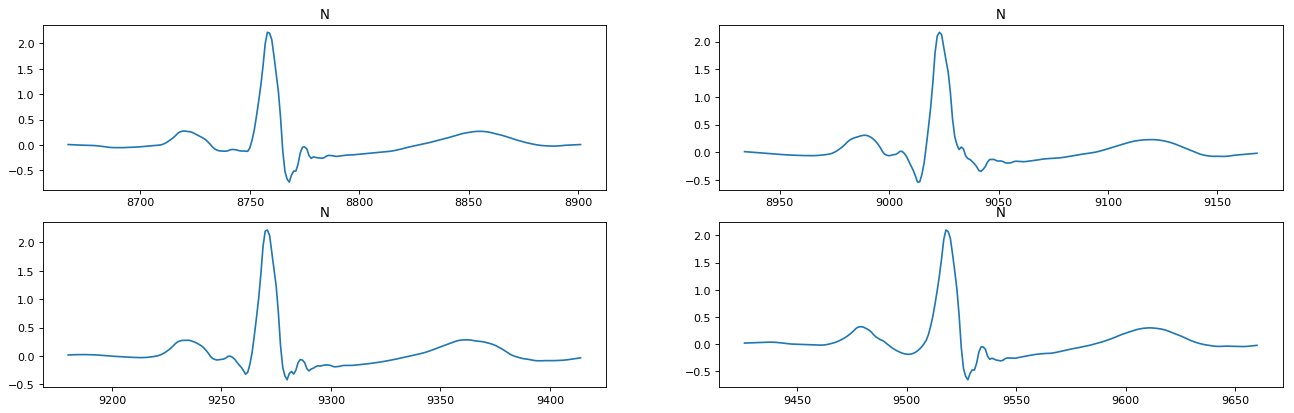

In [6]:
hb_num = 26
hb_set = '106'
plt.figure(figsize=(20, 6), dpi=80)
p1 = plt.subplot(221)
p1.plot(Hbs[hb_set]['lead0'][hb_num])
p1.set_title(Hbs[hb_set]['ann'][hb_num])
p2 = plt.subplot(222)
p2.plot(Hbs[hb_set]['lead0'][hb_num+1])
p2.set_title(Hbs[hb_set]['ann'][hb_num+1])
p3 = plt.subplot(223)
p3.plot(Hbs[hb_set]['lead0'][hb_num+2])
p3.set_title(Hbs[hb_set]['ann'][hb_num+2])
p4 = plt.subplot(224)
p4.plot(Hbs[hb_set]['lead0'][hb_num+3])
p4.set_title(Hbs[hb_set]['ann'][hb_num+3])
plt.show()

# Check Overall Distribution of Lead0 and Lead1

ann:  {'A', 'F', 'J', 'V', 'N'}
Heartbeats amount:  1879


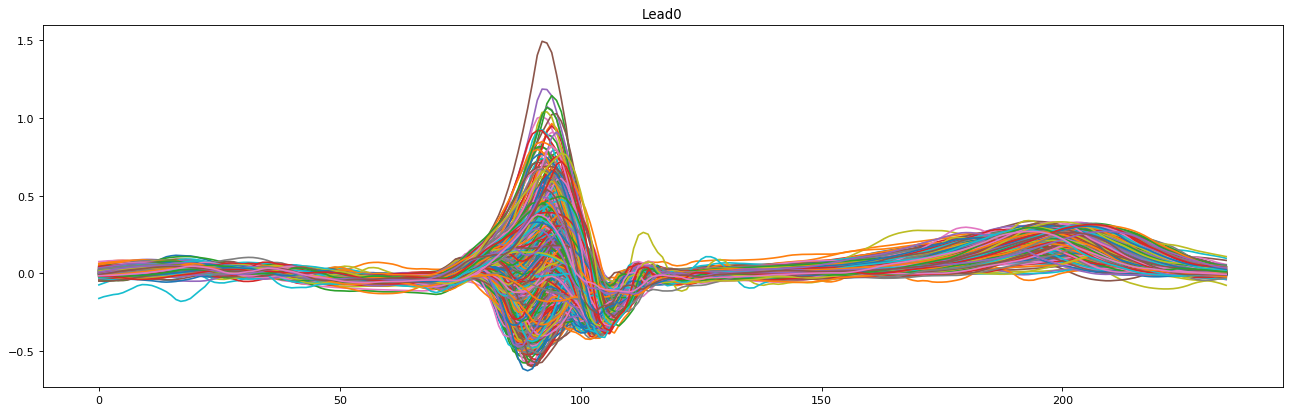

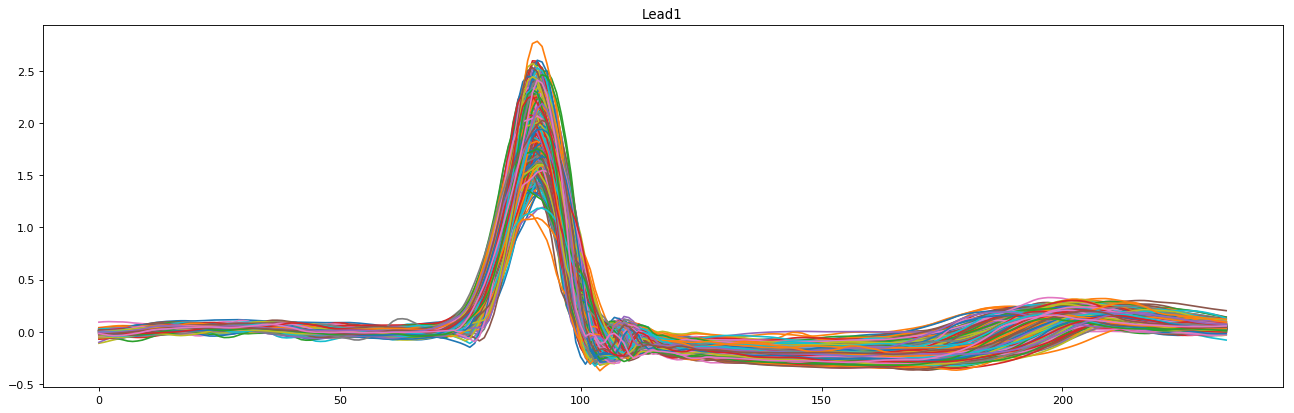

In [28]:
ds = '114'
print('ann: ', set(Hbs[ds]['ann']))
print('Heartbeats amount: ', len(Hbs[ds]))

plt.figure(figsize=(20, 6), dpi=80)
plt.title('Lead0')
for i in range(len(Hbs[ds]) - 1000):
    if Hbs[ds]['ann'][i] in N:
        beat = Hbs[ds]['lead0'][i]
        temp = pd.Series(list(beat))
        plt.plot(temp)
plt.show()

plt.figure(figsize=(20, 6), dpi=80)
plt.title('Lead1')
for i in range(len(Hbs[ds]) - 1000):
    if Hbs[ds]['ann'][i] in N:
        beat = Hbs[ds]['lead1'][i]
        temp = pd.Series(list(beat))
        plt.plot(temp)
plt.show()

# Computing RR Intervals

In [8]:
for ds in DS1:
    dsLast = len(Hbs[ds]['annIdx']) - 1
    preRR = [np.NAN]
    postRR = [Hbs[ds]['annIdx'][1] - Hbs[ds]['annIdx'][0]]
    for l in range(1, dsLast):
        preRR.append(Hbs[ds]['annIdx'][l] - Hbs[ds]['annIdx'][l-1])
        postRR.append(Hbs[ds]['annIdx'][l+1] - Hbs[ds]['annIdx'][l])
    preRR.append(Hbs[ds]['annIdx'][dsLast] - Hbs[ds]['annIdx'][dsLast-1])
    postRR.append(np.NAN)
    Hbs[ds]['preRR'] = preRR
    Hbs[ds]['postRR'] = postRR

In [9]:
Hbs['108'].head(10)

,ann,annIdx,lead0,lead1,preRR,postRR
0,N,441,351 0.120418 352 0.131024 353 0.14175...,351 0.081948 352 0.083029 353 0.07829...,NaN,347.0
1,N,788,698 0.079978 699 0.090436 700 0.10201...,698 0.070500 699 0.080962 700 0.09260...,347.0,366.0
2,N,1154,1064 0.159662 1065 0.169742 1066 0.18...,1064 0.098317 1065 0.093917 1066 0.08...,366.0,338.0
3,N,1492,1402 0.078804 1403 0.089469 1404 0.10...,1402 0.034288 1403 0.046078 1404 0.05...,338.0,328.0
4,N,1820,1730 0.094222 1731 0.101098 1732 0.10...,1730 0.044182 1731 0.055385 1732 0.06...,328.0,336.0
5,N,2156,2066 0.037775 2067 0.042137 2068 0.04...,2066 -0.006833 2067 0.000009 2068 0.00...,336.0,360.0
6,N,2516,2426 0.166031 2427 0.178498 2428 0.18...,2426 0.058149 2427 0.055271 2428 0.04...,360.0,372.0
7,N,2888,2798 0.121368 2799 0.131461 2800 0.14...,2798 0.058178 2799 0.061465 2800 0.06...,372.0,349.0
8,N,3237,3147 0.073041 3148 0.084327 3149 0.09...,3147 0.042782 3148 0.056400 3149 0.07...,349.0,355.0
9,N,3592,3502 0.130744 3503 0.143084 3504 0.15...,3502 0.085314 3503 0.088335 3504 0.08...,355.0,331.0


# Skewness and Kurtosis Calculation

In [10]:
for ds in DS1:
    dsLength = len(Hbs[ds]['annIdx'])
    skewness_0 = []
    kurtosis_0 = []
    skewness_1 = []
    kurtosis_1 = []
    for l in range(0, dsLength):
        skewness_0.append(Hbs[ds]['lead0'][l].skew())
        skewness_1.append(Hbs[ds]['lead1'][l].skew())
        kurtosis_0.append(Hbs[ds]['lead0'][l].kurt())
        kurtosis_1.append(Hbs[ds]['lead1'][l].kurt())
    Hbs[ds]['skewness_0'] = skewness_0
    Hbs[ds]['skewness_1'] = skewness_1
    Hbs[ds]['kurtosis_0'] = kurtosis_0
    Hbs[ds]['kurtosis_1'] = kurtosis_1

In [11]:
Hbs['108'].head(10)

,ann,annIdx,lead0,lead1,preRR,postRR,skewness_0,skewness_1,kurtosis_0,kurtosis_1
0,N,441,351 0.120418 352 0.131024 353 0.14175...,351 0.081948 352 0.083029 353 0.07829...,NaN,347.0,-1.764917,-2.393702,3.738128,4.811425
1,N,788,698 0.079978 699 0.090436 700 0.10201...,698 0.070500 699 0.080962 700 0.09260...,347.0,366.0,-1.801841,-2.370931,3.794816,4.914766
2,N,1154,1064 0.159662 1065 0.169742 1066 0.18...,1064 0.098317 1065 0.093917 1066 0.08...,366.0,338.0,-1.761512,-2.143458,3.742697,3.776546
3,N,1492,1402 0.078804 1403 0.089469 1404 0.10...,1402 0.034288 1403 0.046078 1404 0.05...,338.0,328.0,-1.860206,-2.295183,4.093383,4.660746
4,N,1820,1730 0.094222 1731 0.101098 1732 0.10...,1730 0.044182 1731 0.055385 1732 0.06...,328.0,336.0,-1.671810,-2.452277,2.696963,5.539818
5,N,2156,2066 0.037775 2067 0.042137 2068 0.04...,2066 -0.006833 2067 0.000009 2068 0.00...,336.0,360.0,-1.873624,-2.186213,3.736578,4.438703
6,N,2516,2426 0.166031 2427 0.178498 2428 0.18...,2426 0.058149 2427 0.055271 2428 0.04...,360.0,372.0,-1.651335,-1.938197,2.844290,3.031647
7,N,2888,2798 0.121368 2799 0.131461 2800 0.14...,2798 0.058178 2799 0.061465 2800 0.06...,372.0,349.0,-1.790905,-2.115741,3.457993,3.697135
8,N,3237,3147 0.073041 3148 0.084327 3149 0.09...,3147 0.042782 3148 0.056400 3149 0.07...,349.0,355.0,-1.834017,-2.233547,3.517827,4.486729
9,N,3592,3502 0.130744 3503 0.143084 3504 0.15...,3502 0.085314 3503 0.088335 3504 0.08...,355.0,331.0,-1.731469,-2.172861,3.506571,4.062370


# DWT-based Features

In [12]:
wavelet = pywt.Wavelet('haar')
for ds in DS1:
    dsLength = len(Hbs[ds]['annIdx'])
    cA7_lead0 = []
    cD7_lead0 = []
    cD6_lead0 = []
    cD5_lead0 = []
    cD4_lead0 = []
    cD3_lead0 = []
    cD2_lead0 = []
    cD1_lead0 = []
    
    cA7_lead1 = []
    cD7_lead1 = []
    cD6_lead1 = []
    cD5_lead1 = []
    cD4_lead1 = []
    cD3_lead1 = []
    cD2_lead1 = []
    cD1_lead1 = []
    
    for l in range(0, dsLength):
        beat = list(Hbs[ds]['lead0'][l])
        coffs = pywt.wavedec(beat, wavelet, mode='symmetric', level=7)
        cA7_lead0.append(list(coffs[0]))
        cD7_lead0.append(list(coffs[1]))
        cD6_lead0.append(list(coffs[2]))
        cD5_lead0.append(list(coffs[3]))
        cD4_lead0.append(list(coffs[4]))
        cD3_lead0.append(list(coffs[5]))
        cD2_lead0.append(list(coffs[6]))
        cD1_lead0.append(list(coffs[7]))
        
        beat = list(Hbs[ds]['lead1'][l])
        coffs = pywt.wavedec(beat, wavelet, mode='symmetric', level=7)
        cA7_lead1.append(list(coffs[0]))
        cD7_lead1.append(list(coffs[1]))
        cD6_lead1.append(list(coffs[2]))
        cD5_lead1.append(list(coffs[3]))
        cD4_lead1.append(list(coffs[4]))
        cD3_lead1.append(list(coffs[5]))
        cD2_lead1.append(list(coffs[6]))
        cD1_lead1.append(list(coffs[7]))
    
    Hbs[ds]['cA7_0'] = cA7_lead0
    Hbs[ds]['cD7_0'] = cD7_lead0
    Hbs[ds]['cD6_0'] = cD6_lead0
    Hbs[ds]['cD5_0'] = cD5_lead0
    Hbs[ds]['cD4_0'] = cD4_lead0
    Hbs[ds]['cD3_0'] = cD3_lead0
    Hbs[ds]['cD2_0'] = cD2_lead0
    Hbs[ds]['cD1_0'] = cD1_lead0
    
    Hbs[ds]['cA7_1'] = cA7_lead1
    Hbs[ds]['cD7_1'] = cD7_lead1
    Hbs[ds]['cD6_1'] = cD6_lead1
    Hbs[ds]['cD5_1'] = cD5_lead1
    Hbs[ds]['cD4_1'] = cD4_lead1
    Hbs[ds]['cD3_1'] = cD3_lead1
    Hbs[ds]['cD2_1'] = cD2_lead1
    Hbs[ds]['cD1_1'] = cD1_lead1

In [13]:
Hbs['108']['cD1_0'][0]

[-0.0074995617450749064,
 -0.0081047163052224008,
 -0.0088635493913132718,
 -0.0089143526350593805,
 -0.0085536752677078387,
 -0.0083944282077522692,
 -0.0082084169197369772,
 -0.001682034317365938,
 0.0094872589685911224,
 0.018006359613721601,
 0.026326975188119245,
 0.023706798967939167,
 0.012394729851038989,
 0.0086701713152359111,
 0.0072843656291405653,
 0.0054828289422633944,
 0.0052468931165838978,
 0.0018300778094625936,
 -0.003628726083194183,
 -0.0033334385800890265,
 0.00029133301979894152,
 0.00092220501852032996,
 0.00083705290906356186,
 0.00061137938012709864,
 -0.00038268396028921098,
 -0.00012716328823706574,
 0.00085542725021668306,
 0.0009879607260890079,
 0.00084405686577550959,
 0.0011128467430634587,
 0.0014981707695649119,
 0.000879621784144205,
 -0.0004002728897425159,
 -0.0012132271908611159,
 -0.0019484699101475003,
 0.0023851135581547736,
 0.010568743540437922,
 0.016116912670753894,
 0.021168072665499957,
 0.024309479056773081,
 0.025410377170765219,
 0.02

In [14]:
list(Hbs['108'].columns.values)

['ann',
 'annIdx',
 'lead0',
 'lead1',
 'preRR',
 'postRR',
 'skewness_0',
 'skewness_1',
 'kurtosis_0',
 'kurtosis_1',
 'cA7_0',
 'cD7_0',
 'cD6_0',
 'cD5_0',
 'cD4_0',
 'cD3_0',
 'cD2_0',
 'cD1_0',
 'cA7_1',
 'cD7_1',
 'cD6_1',
 'cD5_1',
 'cD4_1',
 'cD3_1',
 'cD2_1',
 'cD1_1']

# 把lead0和lead1分成2个数据集

In [15]:
Hbs_lead0 = {}
Hbs_lead1 = {}

for ds in DS1:
    Hbs_lead0[ds] = pd.DataFrame({
        'ann': Hbs[ds]['ann'],
        'annIdx': Hbs[ds]['annIdx'],
        'beat': Hbs[ds]['lead0'],
        'preRR': Hbs[ds]['preRR'],
        'postRR': Hbs[ds]['postRR'],
        'skewness': Hbs[ds]['skewness_0'],
        'kurtosis': Hbs[ds]['kurtosis_0'],
        'cA7': Hbs[ds]['cA7_0'],
        'cD7': Hbs[ds]['cD7_0'],
        'cD6': Hbs[ds]['cD6_0'],
        'cD5': Hbs[ds]['cD5_0'],
        'cD4': Hbs[ds]['cD4_0'],
        'cD3': Hbs[ds]['cD3_0'],
        'cD2': Hbs[ds]['cD2_0'],
        'cD1': Hbs[ds]['cD1_0'],
    })
    
    Hbs_lead1[ds] = pd.DataFrame({
        'ann': Hbs[ds]['ann'],
        'annIdx': Hbs[ds]['annIdx'],
        'beat': Hbs[ds]['lead1'],
        'preRR': Hbs[ds]['preRR'],
        'postRR': Hbs[ds]['postRR'],
        'skewness': Hbs[ds]['skewness_1'],
        'kurtosis': Hbs[ds]['kurtosis_1'],
        'cA7': Hbs[ds]['cA7_1'],
        'cD7': Hbs[ds]['cD7_1'],
        'cD6': Hbs[ds]['cD6_1'],
        'cD5': Hbs[ds]['cD5_1'],
        'cD4': Hbs[ds]['cD4_1'],
        'cD3': Hbs[ds]['cD3_1'],
        'cD2': Hbs[ds]['cD2_1'],
        'cD1': Hbs[ds]['cD1_1'],
    })


In [16]:
Hbs_lead0['108'].head(1)

,ann,annIdx,beat,cA7,cD1,cD2,cD3,cD4,cD5,cD6,cD7,kurtosis,postRR,preRR,skewness
0,N,441,351 0.120418 352 0.131024 353 0.14175...,"[-0.685561413268, 0.65103803668]","[-0.00749956174507, -0.00810471630522, -0.0088...","[-0.0217629091613, -0.0255155335626, -0.023813...","[-0.0677518553456, -0.063271887907, 0.17109833...","[-0.190931496466, 0.365841252629, -0.014547511...","[0.300953421359, 0.0146684498695, 1.1193426052...","[0.779052414969, -0.885808312989, -0.364707180...","[1.3384287989, 0.278303533698]",3.738128,347.0,NaN,-1.764917


# Save Extracted Feature to CSV

In [17]:
# 为了处理 beat（series类型）无法正确存在csv里的情况
for ds in DS1:
    beatValues = []
    beatIndexs = []
    for i in range(len(Hbs_lead0[ds]['beat'])):
        beatValues.append(list(Hbs_lead0[ds]['beat'][i].values))
        beatIndexs.append(list(Hbs_lead0[ds]['beat'][i].index))
    Hbs_lead0[ds]['beatValues'] = beatValues
    Hbs_lead0[ds]['beatIndex'] = beatIndexs
    
    beatValues = []
    beatIndexs = []
    for i in range(len(Hbs_lead1[ds]['beat'])):
        beatValues.append(list(Hbs_lead1[ds]['beat'][i].values))
        beatIndexs.append(list(Hbs_lead1[ds]['beat'][i].index))
    Hbs_lead1[ds]['beatValues'] = beatValues
    Hbs_lead1[ds]['beatIndex'] = beatIndexs

In [18]:
for ds in DS1:
    Hbs_lead0[ds].to_csv('Extracted Features/DS1/' + ds + '_lead0.csv', index=False)
    Hbs_lead1[ds].to_csv('Extracted Features/DS1/' + ds + '_lead1.csv', index=False)

In [19]:
testReadData = pd.read_csv('Extracted Features/DS1/' + '108' + '_lead0.csv')
testReadData.head(1)

,ann,annIdx,beat,cA7,cD1,cD2,cD3,cD4,cD5,cD6,cD7,kurtosis,postRR,preRR,skewness,beatValues,beatIndex
0,N,441,351 0.120418\r\n352 0.131024\r\n353 0...,"[-0.68556141326753783, 0.65103803667971594]","[-0.0074995617450749064, -0.008104716305222400...","[-0.021762909161338634, -0.025515533562632808,...","[-0.067751855345557138, -0.063271887907000057,...","[-0.19093149646593821, 0.36584125262880723, -0...","[0.30095342135917191, 0.014668449869526007, 1....","[0.77905241496899391, -0.88580831298868556, -0...","[1.3384287988998684, 0.27830353369783151]",3.738128,347.0,NaN,-1.764917,"[0.12041775474730385, 0.13102373667904321, 0.1...","[351, 352, 353, 354, 355, 356, 357, 358, 359, ..."


# Experiment - Clustering

检查各个心跳类别在RR Interval特征上的分布情况

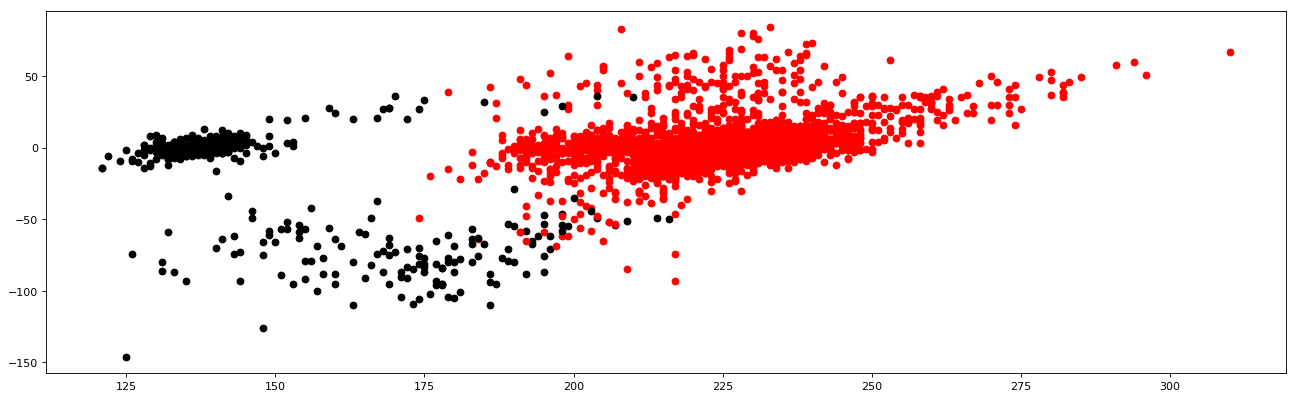

In [49]:
ds = '209'
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']

featureCols = []
beatIdxs = []
for i in range(1, len(Hbs[ds]['ann'])-1):
    if Hbs[ds]['preRR'][i] > 1000 or Hbs[ds]['postRR'][i] > 1000:
        continue
    featureCols.append([Hbs[ds]['preRR'][i], Hbs[ds]['postRR'][i]])
    beatIdxs.append(i)
    
plt.figure(figsize=(20, 6), dpi=80)
for i, features in enumerate(featureCols):
    color = mark[7]
    if Hbs[ds]['ann'][beatIdxs[i]] in N:
        color = mark[0]
    elif Hbs[ds]['ann'][beatIdxs[i]] in VEB:
        color = mark[1]
    elif Hbs[ds]['ann'][beatIdxs[i]] in SVEB:
        color = mark[3]
    plt.plot(features[0], features[0] - features[1], color)
plt.show()

检查各个心跳类别在skewness和kurtosis特征上的分布情况

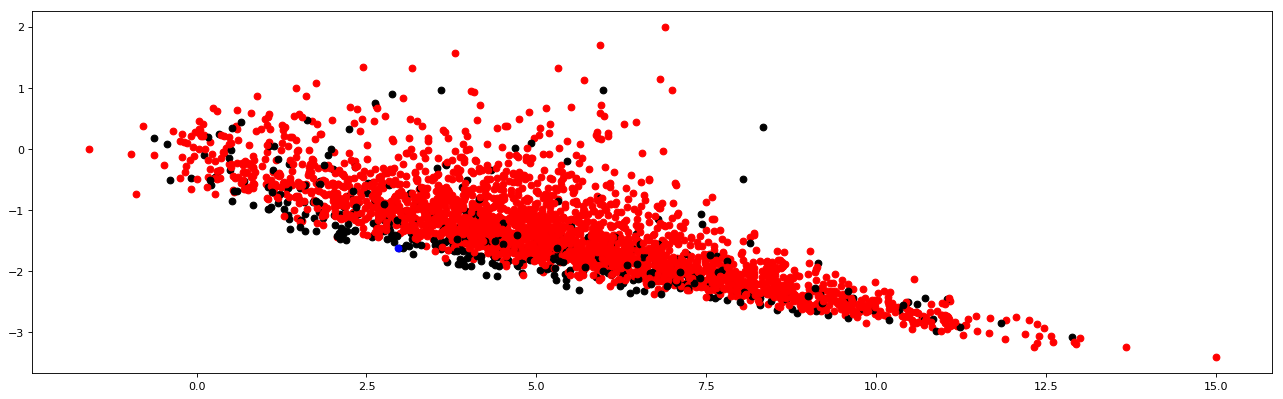

In [50]:
dsCol = ['209']
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']

featureCols = {}
beatIdxs = {}
for ds in dsCol:
    featureCols[ds] = []
    beatIdxs[ds] = []
    for i in range(1, len(Hbs[ds]['ann'])-1):
        featureCols[ds].append([Hbs[ds]['kurtosis_1'][i], Hbs[ds]['skewness_1'][i]])
        beatIdxs[ds].append(i)
    
plt.figure(figsize=(20, 6), dpi=80)
for ds in dsCol:
    for i, features in enumerate(featureCols[ds]):
        color = mark[7]
        if Hbs[ds]['ann'][beatIdxs[ds][i]] in N:
            color = mark[0]  # 红色圆点
        elif Hbs[ds]['ann'][beatIdxs[ds][i]] in VEB:
            color = mark[1]  # 蓝色圆点
        elif Hbs[ds]['ann'][beatIdxs[ds][i]] in SVEB:
            color = mark[3] # 黑色圆点
        plt.plot(features[0], features[1], color)
plt.show()

综上所述，RR Interval对S类周期异常的分类效果比较明显，skewness和kurtosis对V型异常分类效果比较明显

检查各个心跳类别在小波系数特征上的分布情况

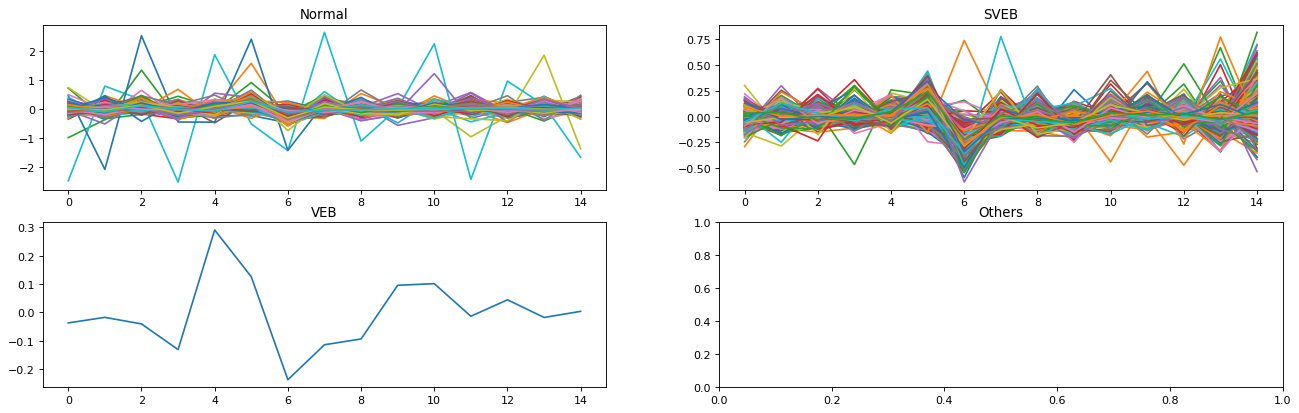

In [55]:
ds = '209'

featureCols = list(Hbs[ds]['cD4_1'])

plt.figure(figsize=(20, 6), dpi=80)
p1 = plt.subplot(221)
p1.set_title('Normal')
p2 = plt.subplot(222)
p2.set_title('SVEB')
p3 = plt.subplot(223)
p3.set_title('VEB')
p4 = plt.subplot(224)
p4.set_title('Others')

for i, feature in enumerate(featureCols):
    if Hbs[ds]['ann'][i] in N:
        p1.plot(featureCols[i])
    elif Hbs[ds]['ann'][i] in SVEB:
        p2.plot(featureCols[i])
    elif Hbs[ds]['ann'][i] in VEB:
        p3.plot(featureCols[i])
    else:
        p4.plot(featureCols[i])

plt.show()